In [1]:
pip install pmdarima

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("DailyTemps.csv", parse_dates = ["DATE"])

In [4]:
data.head()

,DATE,MinTemp,MaxTemp,AvgTemp,Sunrise,Sunset
0,2014-01-01,33.0,46.0,40.0,657,1756
1,2014-01-02,35.0,50.0,43.0,657,1756
2,2014-01-03,36.0,45.0,41.0,657,1757
3,2014-01-04,32.0,41.0,37.0,658,1757
4,2014-01-05,24.0,38.0,31.0,658,1758


<AxesSubplot:>

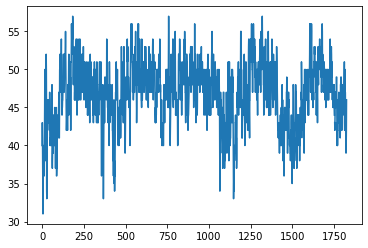

In [5]:
data["AvgTemp"].plot()

In [6]:
from statsmodels.tsa.stattools import adfuller

In [7]:
res = adfuller(data["AvgTemp"].dropna())
pval = res[0]
if pval > 0.05:
    print("Not Stationary")
else:
    print("Stationary")

Stationary


In [8]:
from pmdarima import auto_arima

In [9]:
auto_model = auto_arima(data["AvgTemp"].dropna(), Trace = True)

In [10]:
#p=1, d=0, q= 5

auto_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1821
Model:               SARIMAX(1, 0, 5)   Log Likelihood               -4139.659
Date:                Fri, 09 Apr 2021   AIC                           8295.317
Time:                        12:11:18   BIC                           8339.374
Sample:                             0   HQIC                          8311.571
                               - 1821                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      1.2806      0.379      3.377      0.001       0.537       2.024
ar.L1          0.9724      0.008    118.924      0.000       0.956       0.988
ma.L1         -0.1261      0.024     -5.283      0.000      -0.173      -0.079
ma.L2         -0.2194      0.024     -9.021      0.000      -0.267      -0.172
ma.L3         -0.2015      0.024     -8.374      0.000      -0.249      -0.154
ma.L4         -0.1352      0.023     -5.906      0.000      -0.180      -0.090
ma.L5         -0.0493      0.024     -2.011      0.044      -0.097      -0.001
sigma2         5.5157      0.173     31.847      0.000       5.176       5.855
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                20.90
Prob(Q):                              0.94   Prob(JB):                         0.00
Heteroskedasticity (H):               0.81   Skew:                            -0.17
Prob(H) (two-sided):                  0.01   Kurtosis:                         3.39
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [11]:
from statsmodels.tsa.arima_model import ARIMA

In [12]:
x = data["AvgTemp"].dropna()

In [13]:
x.head()

0    40.0
1    43.0
2    41.0
3    37.0
4    31.0
Name: AvgTemp, dtype: float64

In [14]:
x.shape

(1821,)

In [15]:
data_len = int(0.7 * (len(x)))
data_len 

1274

In [16]:
train = x[:data_len]

In [17]:
test = x[data_len:]

<AxesSubplot:>

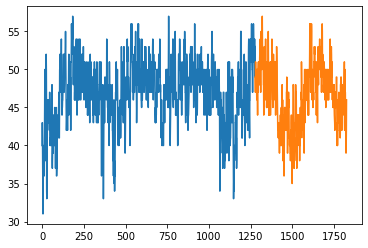

In [18]:
train.plot()
test.plot()

In [19]:
model = ARIMA(train, order =(1,0,5))
model_fit = model.fit()
model_fit.summary()

C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                AvgTemp   No. Observations:                 1274
Model:                     ARMA(1, 5)   Log Likelihood               -2925.613
Method:                       css-mle   S.D. of innovations              2.403
Date:                Fri, 09 Apr 2021   AIC                           5867.226
Time:                        12:11:20   BIC                           5908.425
Sample:                             0   HQIC                          5882.700
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            46.8145      0.880     53.185      0.000      45.089      48.540
ar.L1.AvgTemp     0.9847      0.010    101.110      0.000       0.966       1.004
ma.L1.AvgTemp    -0.1195      0.030     -3.981      0.000      -0.178      -0.061
ma.L2.AvgTemp    -0.2444      0.030     -8.222      0.000      -0.303      -0.186
ma.L3.AvgTemp    -0.2093      0.031     -6.646      0.000      -0.271      -0.148
ma.L4.AvgTemp    -0.1543      0.029     -5.295      0.000      -0.211      -0.097
ma.L5.AvgTemp    -0.0642      0.030     -2.146      0.032      -0.123      -0.006
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0156           +0.0000j            1.0156            0.0000
MA.1            1.0869           -0.0000j            1.0869           -0.0000
MA.2            0.0795           -1.8236j            1.8253           -0.2431
MA.3            0.0795           +1.8236j            1.8253            0.2431
MA.4           -1.8245           -0.9864j            2.0740           -0.4211
MA.5           -1.8245           +0.9864j            2.0740            0.4211
-----------------------------------------------------------------------------
"""

In [20]:
ypred_train = model_fit.predict()

In [21]:
ypred_train

0       46.814467
1       41.249203
2       44.081099
3       41.765682
4       38.299520
          ...    
1272    50.417288
1273    50.834084
1274    53.379281
1275    48.717820
1276    51.998486
Length: 1274, dtype: float64

In [22]:
ypred_test = model_fit.predict(start = len(train), end = (len(x)-1))

C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [23]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [24]:
print("MAE",mean_absolute_error(test,ypred_test))
print("MSE",mean_squared_error(test,ypred_test))
print("RMAE",np.sqrt(mean_absolute_error(test,ypred_test)))

MAE 3.1982551347655717
MSE 16.20050113660318
RMAE 1.7883666108395033


In [25]:
ypred_test

1274    52.373910
1275    51.829286
1276    51.317598
1277    50.883345
1278    50.756657
          ...    
1816    46.815433
1817    46.815418
1818    46.815404
1819    46.815389
1820    46.815375
Length: 547, dtype: float64

In [26]:
test

1277    49.0
1278    47.0
1279    51.0
1280    48.0
1281    48.0
        ... 
1820    40.0
1821    39.0
1822    40.0
1823    42.0
1824    46.0
Name: AvgTemp, Length: 547, dtype: float64

In [27]:
"2017-07-01","2018-12-30"  #test data start date and end date

('2017-07-01', '2018-12-30')

In [28]:
test_dates =pd.date_range(start = '2017-07-01', end =  '2018-12-29') #0.7

In [29]:
test_dates

DatetimeIndex(['2017-07-01', '2017-07-02', '2017-07-03', '2017-07-04',
               '2017-07-05', '2017-07-06', '2017-07-07', '2017-07-08',
               '2017-07-09', '2017-07-10',
               ...
               '2018-12-20', '2018-12-21', '2018-12-22', '2018-12-23',
               '2018-12-24', '2018-12-25', '2018-12-26', '2018-12-27',
               '2018-12-28', '2018-12-29'],
              dtype='datetime64[ns]', length=547, freq='D')

In [30]:
ypred_test.index = test_dates

In [31]:
ypred_test.head()

2017-07-01    52.373910
2017-07-02    51.829286
2017-07-03    51.317598
2017-07-04    50.883345
2017-07-05    50.756657
Freq: D, dtype: float64

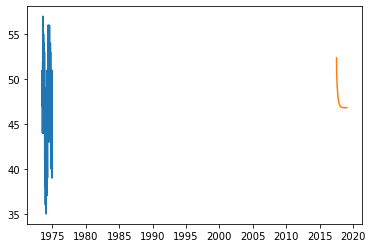

In [32]:
plt.plot(test)
plt.plot(ypred_test)

In [33]:
new_date_range = pd.date_range(start = "2018-12-30", end = "2019-01-28")
new_date_range

DatetimeIndex(['2018-12-30', '2018-12-31', '2019-01-01', '2019-01-02',
               '2019-01-03', '2019-01-04', '2019-01-05', '2019-01-06',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-12', '2019-01-13', '2019-01-14',
               '2019-01-15', '2019-01-16', '2019-01-17', '2019-01-18',
               '2019-01-19', '2019-01-20', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-26',
               '2019-01-27', '2019-01-28'],
              dtype='datetime64[ns]', freq='D')

In [34]:
model = ARIMA (x, order = (1,0,5))
model_fit = model.fit()

C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. fo

In [37]:
new_pred = model_fit.predict(start = len(x), end = len(x)+29)

C:\Users\tejas\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [38]:
len(new_pred),len(new_date_range)

(30, 30)

In [39]:
new_pred.Index = new_date_range

In [40]:
new_pred

1821    46.418067
1822    46.113788
1823    45.617779
1824    45.249564
1825    45.116994
1826    45.136781
1827    45.156291
1828    45.175528
1829    45.194495
1830    45.213196
1831    45.231636
1832    45.249817
1833    45.267743
1834    45.285418
1835    45.302846
1836    45.320030
1837    45.336972
1838    45.353678
1839    45.370149
1840    45.386390
1841    45.402403
1842    45.418191
1843    45.433759
1844    45.449108
1845    45.464243
1846    45.479165
1847    45.493879
1848    45.508386
1849    45.522690
1850    45.536793
dtype: float64